In [1]:
#import libraries
import pandas as pd    #data manipulation and analysis
import numpy as np     #mathematical operations on array
import os              #handle files using system commands
import matplotlib.pyplot as plt    #data visualization
import seaborn as sns          #advanced data visualization
import librosa       #analyze sound files
import librosa.display    #display sound data as images
from IPython.display import Audio     #display and hear the audio
import warnings         #manipulate warnings details
warnings.filterwarnings('ignore')


In [2]:
# Getting TESS data:
paths, labels = [], []

for dirname, _, filenames in os.walk("C:/Users/suraj/OneDrive/Desktop/Speech_Emotion_Recognition/Tess/"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename[::-1].split('_')[0][::-1]
        labels.append(label[:-4].lower())

df_tess = pd.DataFrame({'path':paths, 'emotion':labels})

df_tess['emotion'] = df_tess['emotion'].replace(['ps'], 'surprise')
                  
df_tess.sample(5)

,path,emotion
853,C:/Users/suraj/OneDrive/Desktop/Speech_Emotion...,neutral
344,C:/Users/suraj/OneDrive/Desktop/Speech_Emotion...,disgust
1007,C:/Users/suraj/OneDrive/Desktop/Speech_Emotion...,surprise
8,C:/Users/suraj/OneDrive/Desktop/Speech_Emotion...,angry
1669,C:/Users/suraj/OneDrive/Desktop/Speech_Emotion...,disgust


In [3]:
# Getting RAVDESS data
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk("C:/Users/suraj/OneDrive/Desktop/Speech_Emotion_Recognition/Ravness/"):
    for filename in filenames:
        
        paths.append(os.path.join(dirname, filename))
        
        
        
        label = filename[::-1].split('_')[0][::-1]
        
        if label[6:8] == '01':
            labels.append('neutral')
        elif label[6:8] == '02':
            labels.append('calm')
        elif label[6:8] == '03':
            labels.append('happy')
        elif label[6:8] == '04':
            labels.append('sad')
        elif label[6:8] == '05':
            labels.append('angry')
        elif label[6:8] == '06':
            labels.append('fear')
        elif label[6:8] == '07':
            labels.append('disgust')
        elif label[6:8] == '08':
            labels.append('surprise')       

df_ravdess = pd.DataFrame({'path':paths, 'emotion':labels})

df_ravdess.sample(5)

,path,emotion
345,C:/Users/suraj/OneDrive/Desktop/Speech_Emotion...,disgust
1368,C:/Users/suraj/OneDrive/Desktop/Speech_Emotion...,disgust
1168,C:/Users/suraj/OneDrive/Desktop/Speech_Emotion...,angry
1201,C:/Users/suraj/OneDrive/Desktop/Speech_Emotion...,neutral
1363,C:/Users/suraj/OneDrive/Desktop/Speech_Emotion...,fear


In [4]:
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk("C:/Users/suraj/OneDrive/Desktop/Speech_Emotion_Recognition/AudioData/"):
    for filename in filenames:
        
        paths.append(os.path.join(dirname, filename))
        
        label = filename[::-1].split('_')[0][::-1]
        
        if label[:1] == 'a':
            labels.append('angry')
        elif label[:1] == 'd':
            labels.append('disgust')
        elif label[:1] == 'f':
            labels.append('fear')
        elif label[:1] == 'h':
            labels.append('happy')
        elif label[:1] == 'n':
            labels.append('neutral')
        elif label[:1] == 's':
            if label[:2] == 'sa':
                labels.append('sad')
            else:
                labels.append('surprise')

paths = paths[1:] # to filter out 'info.txt' file



df_savee = pd.DataFrame({'path':paths, 'emotion':labels})
                  
df_savee.sample(5)

,path,emotion
136,C:/Users/suraj/OneDrive/Desktop/Speech_Emotion...,disgust
466,C:/Users/suraj/OneDrive/Desktop/Speech_Emotion...,surprise
140,C:/Users/suraj/OneDrive/Desktop/Speech_Emotion...,disgust
190,C:/Users/suraj/OneDrive/Desktop/Speech_Emotion...,neutral
479,C:/Users/suraj/OneDrive/Desktop/Speech_Emotion...,surprise


In [5]:
# Let's merge the datesets together, now that they have been formatted the same way:

df = pd.concat([df_tess, df_ravdess, df_savee])



In [6]:
df['emotion'].value_counts()

angry       652
disgust     652
fear        652
happy       652
surprise    652
sad         652
neutral     616
calm        192
Name: emotion, dtype: int64

In [7]:
#dropping calm because there are less examples
# Let's merge the datesets together, now that they have been formatted the same way:

df = pd.concat([df_tess, df_ravdess, df_savee])

# Dropping 'calm' as out the scope (also not many samples)
df = df[df['emotion'].str.contains('calm') == False].reset_index(drop=True)

print('The dataset has {} audio files. Below printed 5 random entries:'.format(df.shape[0]))

print(df['emotion'].value_counts())

The dataset has 4528 audio files. Below printed 5 random entries:
angry       652
disgust     652
fear        652
happy       652
surprise    652
sad         652
neutral     616
Name: emotion, dtype: int64


In [8]:
def waveplot(data, sr, emotion):
    
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [9]:
def spectogram(data, sr, emotion):
    
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr=sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()

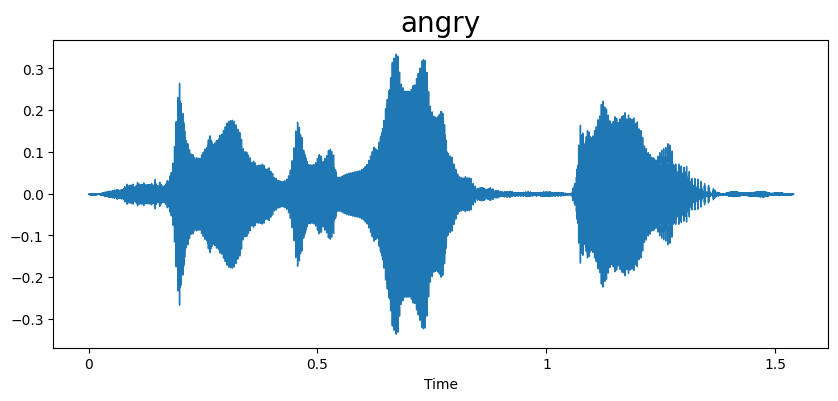

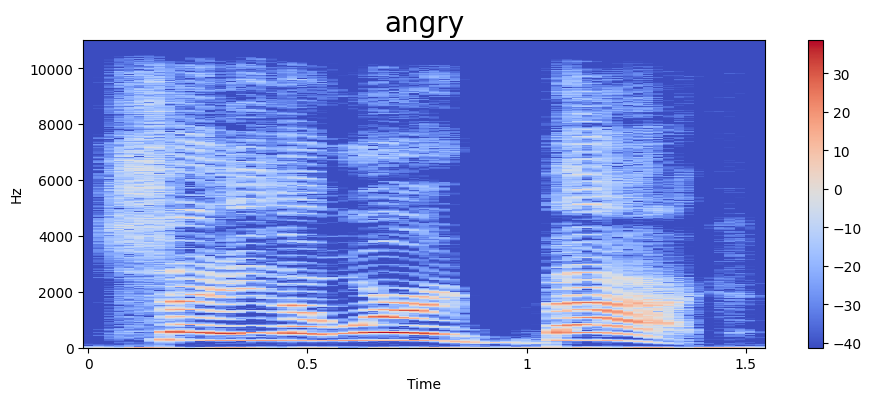

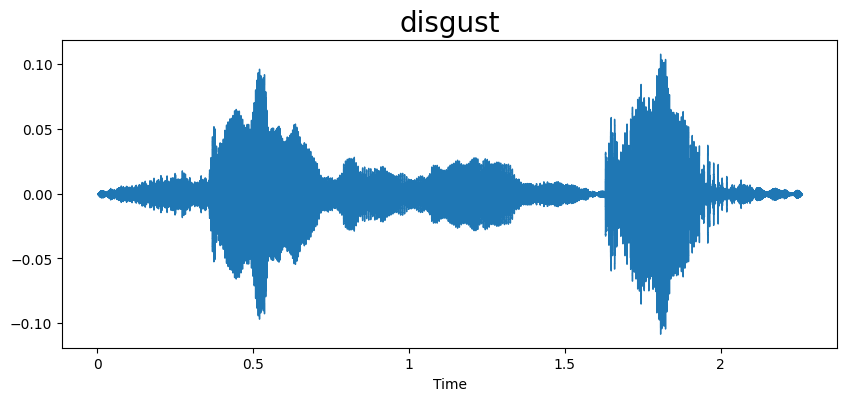

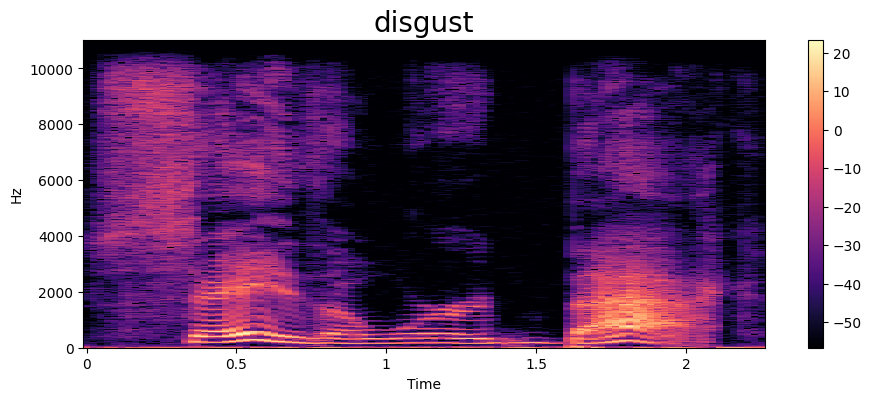

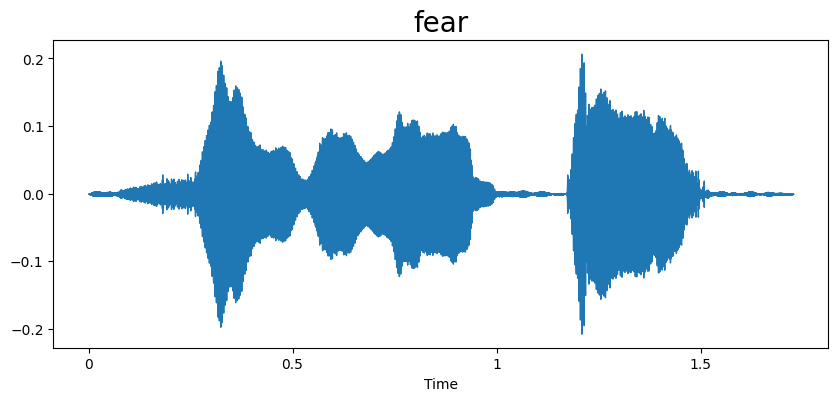

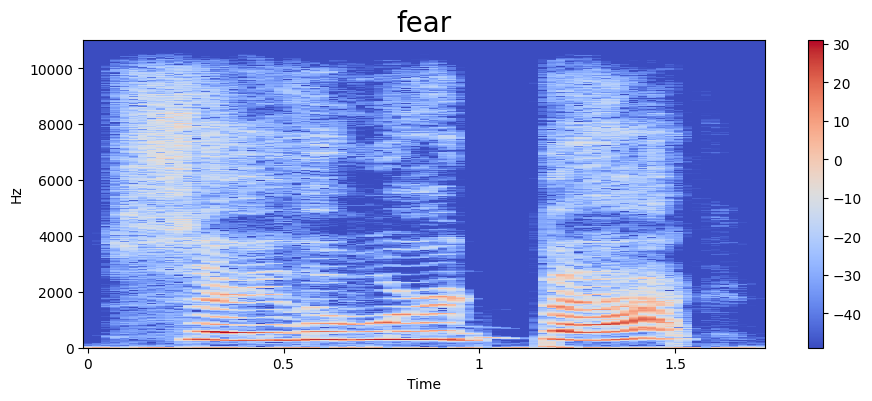

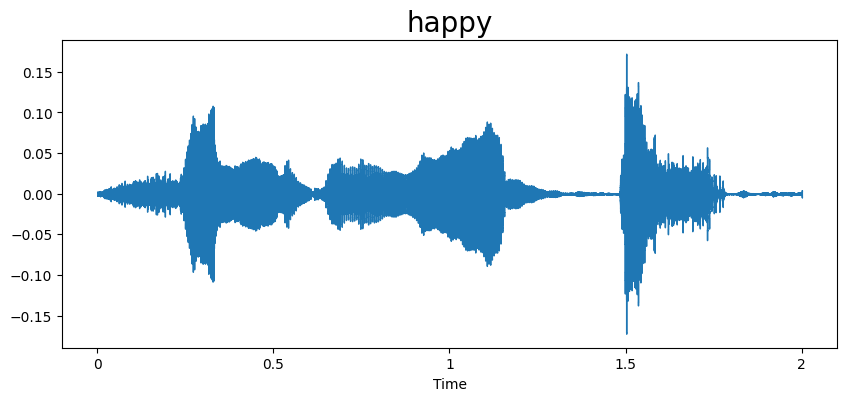

IndexError: index 0 is out of bounds for axis 0 with size 0

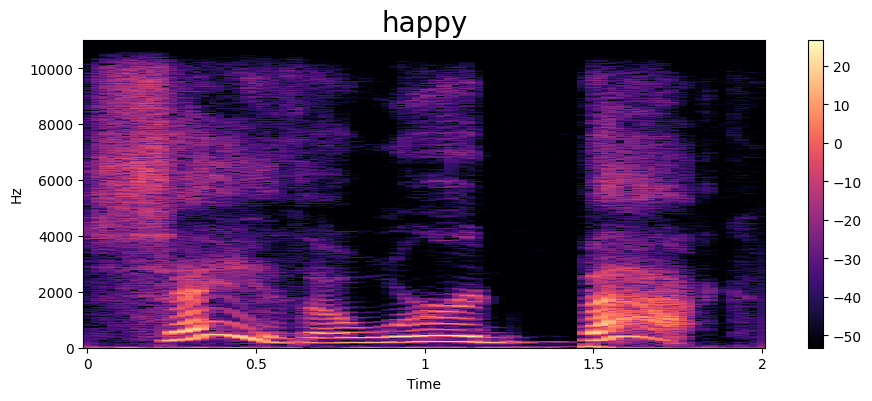

In [11]:
emotion = ['angry', 'disgust', 'fear', 'happy', 'suprise', 'sad', 'neutral']
for i in emotion:
    path = np.array(df['path'][df['emotion']==i])[0]
    data, sampling_rate = librosa.load(path)
    waveplot(data, sampling_rate, i)
    print('\n')
    spectogram(data, sampling_rate, i)
    display(Audio(path))

In [12]:
def extract_mfcc(filename):
    
    y, sr = librosa.load(filename, duration = 3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [13]:
extract_mfcc(df['path'][0])

array([-3.9791476e+02,  7.8756226e+01, -2.0911753e+01, -2.0349020e+01,
       -3.4199812e+00,  1.1357657e+01, -2.1622475e+01, -4.8617826e+00,
       -8.4185266e+00,  6.2100208e-01, -2.9795790e+00,  1.3149230e+00,
       -3.4300953e-01,  2.3402820e+00,  1.9168801e+00,  3.7745941e+00,
       -5.5863881e+00, -3.6113353e+00, -2.3929300e+00, -9.5256548e+00,
       -8.2061357e+00, -1.2038866e+00, -7.5688176e+00,  9.9129763e+00,
        7.9321527e+00,  2.2083347e+01,  1.8905153e+01,  2.0599804e+01,
        1.3219537e+01,  8.4827595e+00,  3.0294439e-01,  5.1541729e+00,
        9.5726032e+00,  5.4089766e+00,  2.6034529e+00, -1.9647242e+00,
        5.0509210e+00,  9.0977497e+00,  2.3394349e+00, -2.1917243e+00],
      dtype=float32)

In [14]:
X_mfcc = df['path'].apply(lambda x : extract_mfcc(x))          
X_mfcc

0       [-397.91476, 78.756226, -20.911753, -20.34902,...
1       [-466.53455, 99.911064, -0.48027268, -31.61629...
2       [-431.5178, 48.56504, -0.8924488, 2.2234004, 0...
3       [-405.01205, 78.51893, -14.72178, -20.10229, -...
4       [-435.3804, 79.39025, 8.873595, 18.061928, 6.0...
                              ...                        
4523    [-555.8329, 117.22932, 26.236433, 47.480766, 8...
4524    [-529.01575, 131.75366, 25.293596, 39.820004, ...
4525    [-570.3409, 129.51169, 37.83662, 28.9299, 10.2...
4526    [-531.93427, 113.95271, 19.894539, 24.738325, ...
4527    [-541.2523, 127.30368, 26.698538, 28.052952, -...
Name: path, Length: 4528, dtype: object

In [15]:
X_mfcc.shape

(4528,)

In [16]:
#Coverting this to a single dimenstional array
X = [x for x in X_mfcc]
X = np.array(X)
X.shape          

(4528, 40)

In [17]:
# input split
X = np.expand_dims(X, -1)
X.shape         

(4528, 40, 1)

In [19]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras.utils import to_categorical
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(df['emotion']))
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [21]:
y.shape

(4528, 7)

In [22]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size= 0.20, random_state =30)

In [23]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (3622, 40, 1)
X_test:  (906, 40, 1)
y_train:  (3622, 7)
y_test:  (906, 7)


In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [31]:
model=Sequential([
    LSTM(256,return_sequences=False,input_shape=(40,1)),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 455       
                                                                 
Total params: 305,799
Trainable params: 305,799
Non-tr

In [32]:
#Train the model
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 50, batch_size = 128)

Epoch 1/50
23/23 [==============================] - 4s 115ms/step - loss: 1.6486 - accuracy: 0.3379 - val_loss: 1.2713 - val_accuracy: 0.5214
Epoch 2/50
23/23 [==============================] - 2s 97ms/step - loss: 1.2377 - accuracy: 0.5288 - val_loss: 1.0414 - val_accuracy: 0.6124
Epoch 3/50
23/23 [==============================] - 2s 109ms/step - loss: 1.0464 - accuracy: 0.6341 - val_loss: 0.9237 - val_accuracy: 0.6662
Epoch 4/50
23/23 [==============================] - 2s 97ms/step - loss: 0.9584 - accuracy: 0.6652 - val_loss: 0.9148 - val_accuracy: 0.6634
Epoch 5/50
23/23 [==============================] - 2s 98ms/step - loss: 0.9096 - accuracy: 0.6800 - val_loss: 0.8316 - val_accuracy: 0.6979
Epoch 6/50
23/23 [==============================] - 2s 102ms/step - loss: 0.8674 - accuracy: 0.6831 - val_loss: 0.8375 - val_accuracy: 0.6897
Epoch 7/50
23/23 [==============================] - 2s 102ms/step - loss: 0.8516 - accuracy: 0.6921 - val_loss: 0.7646 - val_accuracy: 0.7186
Epoch 8/5

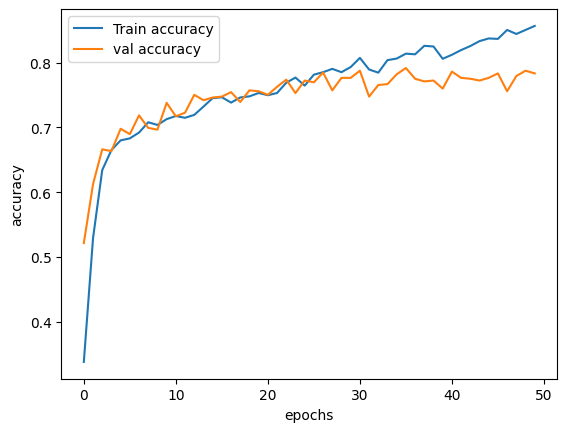

In [35]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'Train accuracy')
plt.plot(epochs, val_acc, label = 'val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

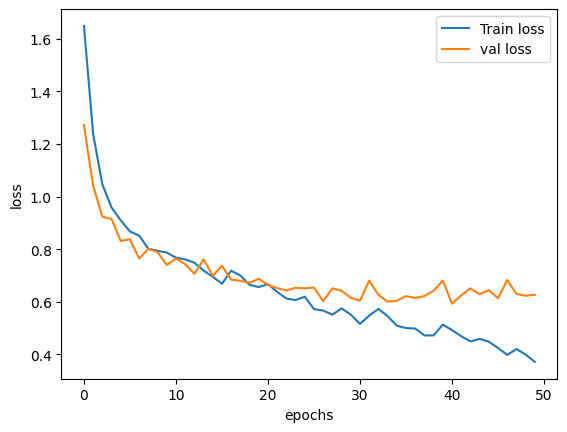

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'Train loss')
plt.plot(epochs, val_loss, label = 'val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [37]:
score = model.evaluate(X_train, y_train)
print ("Model evaluation Train accuracy: ", round(score[1]*100),"%")

114/114 [==============================] - 3s 23ms/step - loss: 0.3672 - accuracy: 0.8642
Model evaluation Train accuracy:  86 %


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

y_train_pred = model.predict(X_train, batch_size=5)
y_train_pred = (y_train_pred > 0.5)

print(confusion_matrix(y_train.argmax(axis=1), y_train_pred.argmax(axis=1)))

print(classification_report(y_train, y_train_pred))

725/725 [==============================] - 4s 5ms/step
[[493  13   2  11   0   0   3]
 [ 98 392   2   3   6   7   8]
 [ 68   2 444   2   0   1   6]
 [ 86   0   8 430   1   3   7]
 [ 74   0   0   0 389  12   4]
 [ 95   3   7   2   7 398   4]
 [ 69   3   4   8   0   1 446]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       522
           1       0.95      0.76      0.84       516
           2       0.95      0.85      0.90       523
           3       0.94      0.80      0.87       535
           4       0.97      0.81      0.88       479
           5       0.94      0.77      0.85       516
           6       0.93      0.84      0.88       531

   micro avg       0.94      0.81      0.87      3622
   macro avg       0.94      0.81      0.87      3622
weighted avg       0.94      0.81      0.87      3622
 samples avg       0.81      0.81      0.81      3622



In [39]:
score = model.evaluate(X_test, y_test)
print ("Model evaluation Test accuracy: ", round(score[1]*100),"%")

29/29 [==============================] - 1s 27ms/step - loss: 0.7034 - accuracy: 0.7715
Model evaluation Test accuracy:  77 %


In [40]:
y_test_pred = model.predict(X_test, batch_size=5)
y_test_pred = (y_test_pred > 0.5)

print(confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1)))

print(classification_report(y_test, y_test_pred))

182/182 [==============================] - 1s 5ms/step
[[110   7   3   9   0   0   1]
 [ 31  95   3   2   0   2   3]
 [ 17   1  99   5   0   3   4]
 [ 36   4   3  72   0   0   2]
 [ 18   1   1   2 112   3   0]
 [ 22   1   4   1   5  98   5]
 [ 25   4   4   5   0   0  83]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.76       130
           1       0.84      0.70      0.76       136
           2       0.85      0.77      0.80       129
           3       0.75      0.62      0.68       117
           4       0.96      0.82      0.88       137
           5       0.92      0.72      0.81       136
           6       0.85      0.69      0.76       121

   micro avg       0.85      0.72      0.78       906
   macro avg       0.85      0.72      0.78       906
weighted avg       0.85      0.72      0.78       906
 samples avg       0.72      0.72      0.72       906



In [ ]:
filename= "C:\Users/suraj/OneDrive/Desktop/Speech_Emotion_Recognition/Tess/OAF_angry/OAF_bar_angry.wav"
y, sr = librosa.load(filename, duration = 3, offset=0.5)
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

print('MFCC: ', mfcc)
mfcc = mfcc.reshape(1, -1)
print('mfcc: ',mfcc)
print(mfcc.shape)
predicted_label = model.predict([mfcc])
predicted_label=np.argmax(predicted_label,axis=1)
print('Predicted label: ',predicted_label)
predicted_class = lb.inverse_transform(predicted_label)
print('Predicted classes: ',predicted_class)